# TEAM 6 AI PROJECT

### GROUP MEMBERS:
1. Charles Nana Kwakye - r0879035 
2. Emmanuel Akpandara - r0879038
3. Arthur Birate Kabanza - r0889635

### PROJECT DESCRIPTION: 
There has been instances of hornet attacks on bee hives and this poses a significant threat to the bee populations which also negatively impacts pollination and honey production, the goal is to create an application which uses computer vision to identify these hornets before they cause significant damage to nearby beehives.

### PROJECT STEPS:
1. Data Collection
2. Data Preprocessing
3. Model Training
4. Model Evaluation
5. Model Deployment (Streamlit)

## 1. Data Collection
A data scrapper was created using beautiful soup to scrape images from multiple sources, such as vista, youtube video, shutter stock and many more. The scrapper was built with one website in mind which was vista but it was later modified to scrape images from other sources.

### Install Dependencies
```
%pip install requests
%pip install beautifulsoup4
```
### Import Dependencies
```
import requests
from bs4 import BeautifulSoup
import os
```

### Build Scraper
```
def image_scrapper(base_url,limit_page, prefix=None ,primary_html_tag=None, primary_selector=None, primary_class_name=None,
                   secondary_html_tag=None, secondary_selector=None, 
                   secondary_class_name=None,output_folder=None, custom_data=None, max_counter=None):
    

    for number_page in range(1,limit_page):
    
        url=f"{base_url}{prefix}page={number_page}"

        get_sites = requests.get(url)  


        if not os.path.exists(output_folder):
            os.mkdir(output_folder)
            
        soup = BeautifulSoup(get_sites.content, 'html.parser')

        get_container = soup.find(primary_html_tag,{primary_selector:primary_class_name})
     
        get_images_tags =  get_container.find_all(secondary_html_tag,{secondary_selector:secondary_class_name})

        images = []
        images.append(len(get_images_tags))
        print(len(get_images_tags))

       
        for i, image in  enumerate(get_images_tags):                      

                img = image["src"]

                part = img.split('.svg')[0]

                format_img = "{}.jpeg".format(part)
                flag = requests.get(format_img)
                with open(f"{output_folder}/{custom_data}{number_page}_{i}.jpeg", 'ab') as file:
                    file.write(flag.content)
```

This code defines a function called `image_scrapper` that is designed to scrape images from a website. The function takes several parameters, including the base URL (`base_url`), the number of pages to scrape (`limit_page`), and various HTML tags, selectors, and class names to identify the relevant elements on the web pages. It utilizes the requests library to fetch the HTML content of each page, and BeautifulSoup for parsing the HTML. The images are then extracted from the specified HTML elements, and the function downloads and saves them to a specified output folder. The naming convention for the saved images includes the page number and a counter for each image. Note that there are some potential issues with the code, such as the absence of error handling for HTTP requests and assumptions about the image file format. Additionally, it's important to make sure that web scraping is allowed by the website's terms of service.

### Initiate Scraper
```
## Scrapping images of bees from vista.com 
site_url = "https://create.vista.com/photos/bees/"
limit_page = 17
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="bees"
custom_data="bee"



bees = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)
```
The scrapper function built would called and the parameters would be passed to it to scrape images of bees from vista.com. This is repeated for other insects such as bees and hornets and other sources such as shutterstock.

### Renaming Images and Storing in Folders
After the images were scraped, they were renamed and stored in folders in bulk

### Ref: Bing AI
##### Prompts:
1. Provide me a with a python code for web scrappping images of bees from a website
2. Explain this code to me


## 2. Data Preprocessing

#### Accomplishment 1:
The data preprocessing step was done in roboflow. Before the data preprocessingvstep, the data is supposed to cleaned but because this were images we did not write any code to do this but instead we manually cleaned the data by removing irelevant images that were not of good quality when labelling the data in roboflow. We first tested the roboflow platform with a small dataset of 60 images and trained a model to detect bees. During the evaluation of this model we were surprised by how well it performed when detecting bees because of how small the dataset was.

#### Accomplishment 2:
We decided to train a model on a larger dataset of bees to make our model detect bees better. We scrapped an additional 5,500 + images of bees more and labelled them in roboflow. After labelling the data, we trained a model on the data and evaluated the model. The model performed well on both training and test dataset. The model was able to detect bees in images woith high accuracy but when we tested it on a video we noticed that detecting smaller bees was difficult for the model and it did well detecting bees when the camera zoomed in on the bees. We made some research and asked for help from our professor. We came to a conclution it was from out dataset so we investicated the dataset and found something interesting. When we checked the health of the dataset in roboflow we noticed that we did not have enough images of smaller labelled bees. We ignored the detection of bees since that was not the main focus of the project and set concentrated on detecting hornets.

#### Accomplishment 3:
We decided to scraped images for hornet and train the model on this new dataset involving two classes, bees and hornets. The scrapping part of the hornets was very difficult as we could not find enough images on any website for the specific hornet. After enough searching and scraping we were able to label about 800 images of hornets and trained a model on this dataset. The model performed well on the training and test dataset but when we tested it on a video we noticed that the model sometimes confused bees for hornets and hornets for bees. We decided to scrap more images of hornets and label them. We were able to scrap about 1,500 images of hornets and trained a model on this dataset. The model performed well on the training and test dataset but when we tested it on a video we noticed that the model sometimes confused bees for hornets and hornets for bees. We decided to scrap more images of hornets and label them. We were able to scrap about 1,500 images of hornets and trained a model on this dataset. The model performed well on the training and test dataset but when we tested it on a video we noticed that the model sometimes confused bees for hornets and hornets for bees. We decided to scrap more images of hornets and label them. We were able to scrap about 1,500 images of hornets and trained a model on this dataset. The model performed well on the training and test dataset but when we tested it on a video we noticed that the model sometimes confused bees for hornets and hornets for bees. We asked our professor about this and we were told that we needed to train the model on more images of hornets. At this stage of the project we decided to move on with the object tracting with deepsort beause we can add more images of hornets to the dataset and train the model on it later to improve the model. At this stage the health of the dataset looked like this:




In [ ]:
!nvidia-smi

Mon Nov 13 16:04:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Istall YOLOv8

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.4/78.2 GB disk)


Import Yolo
Import Image for displaying Images

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="x0QZeA7t3sqGYQ6qjFEu")
project = rf.workspace("aiprojectteam6").project("bee_detection-e95se")
dataset = project.version(3).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Bee_Detection-1 in yolov8:: 100%|██████████| 136/136 [00:00<00:00, 4518.15it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Bee_Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png	     train_batch45.jpg
confusion_matrix.png				   results.csv	     train_batch46.jpg
events.out.tfevents.1699891032.212edc7cf9ad.482.0  results.png	     train_batch47.jpg
F1_curve.png					   train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					   train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					   train_batch2.jpg  weights


/content


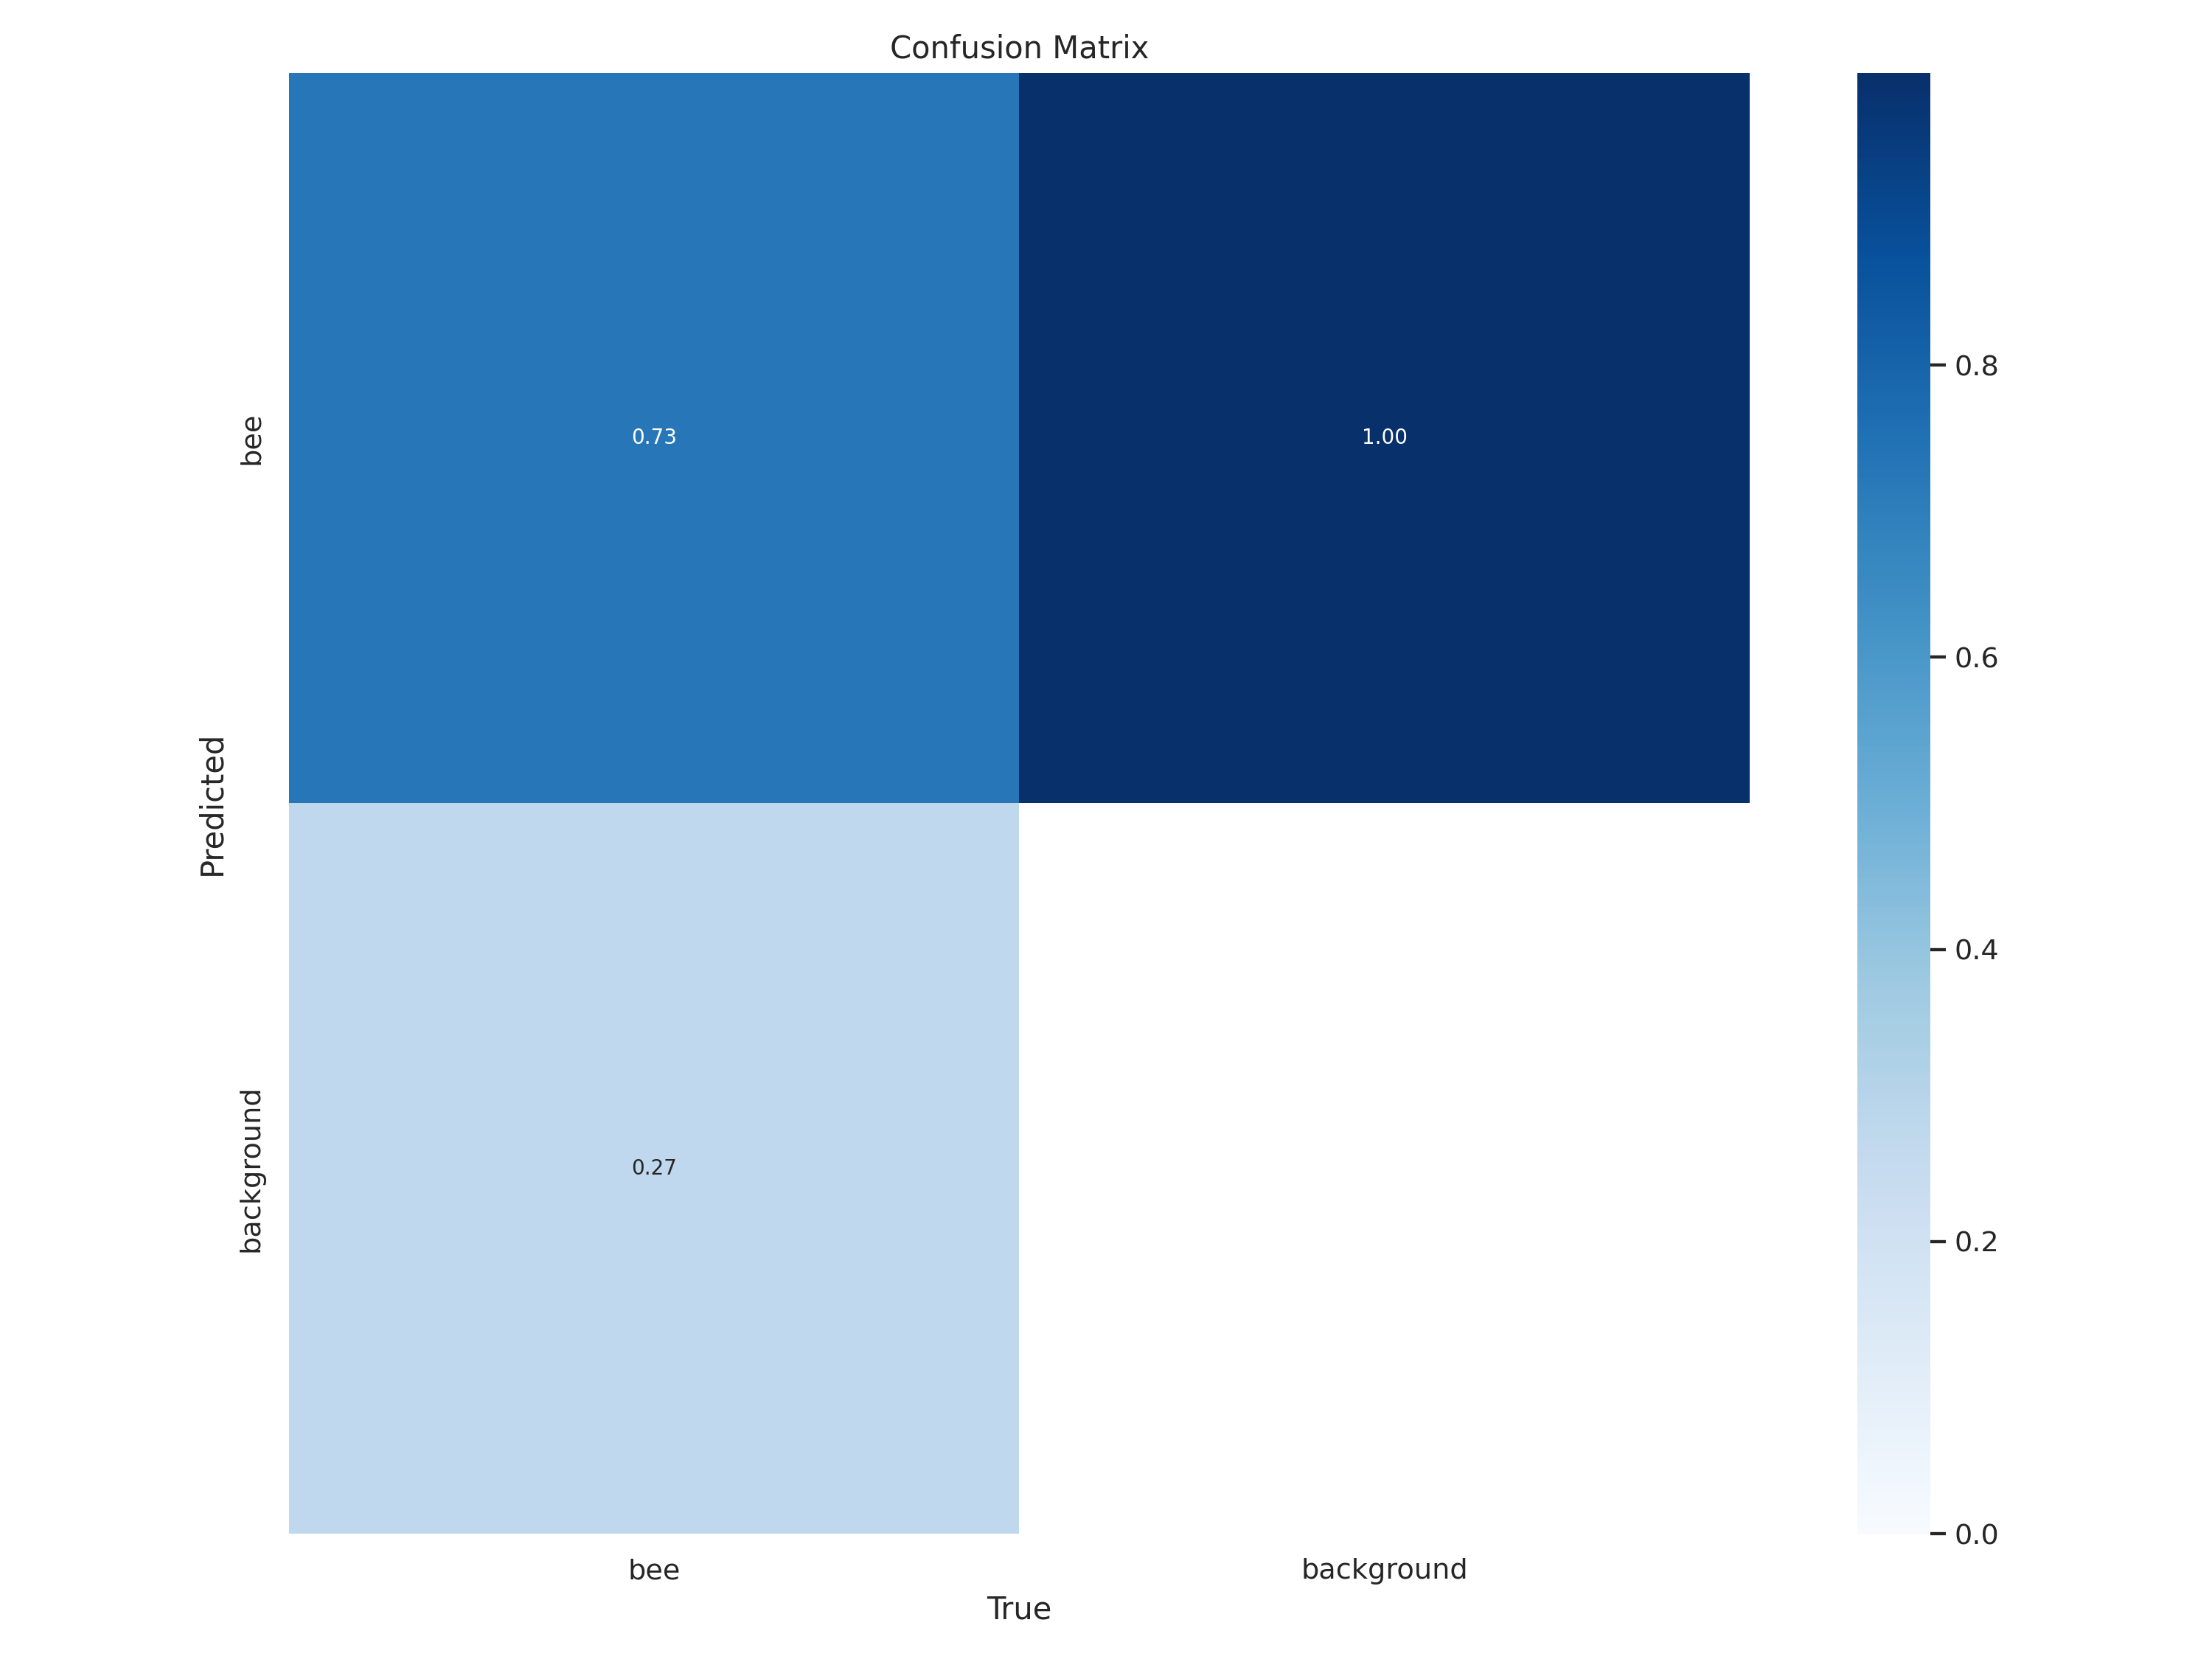

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


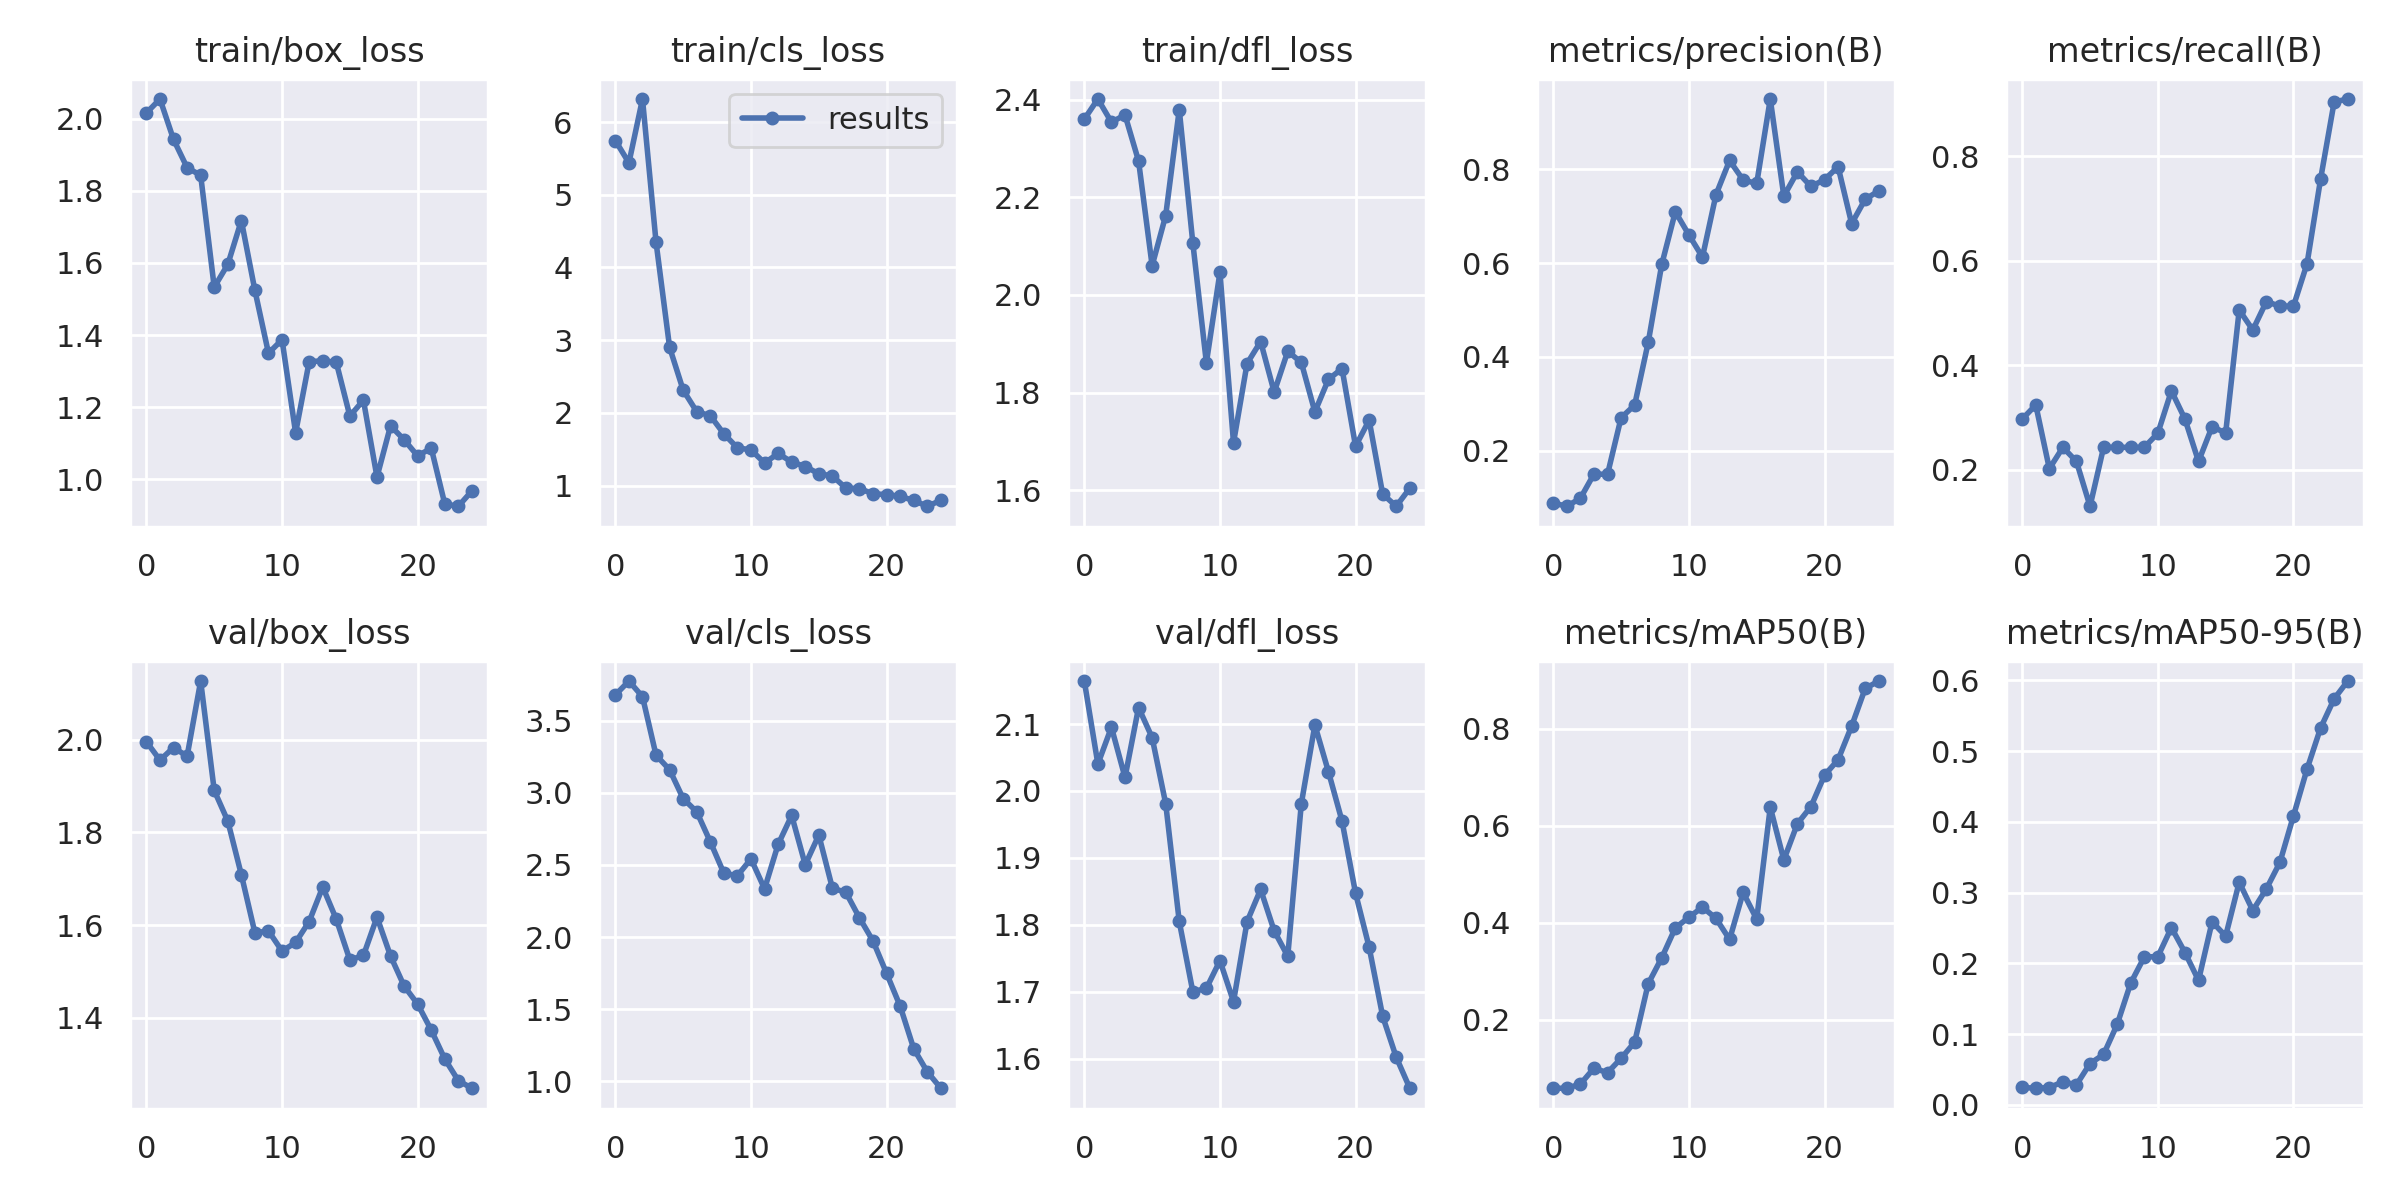

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


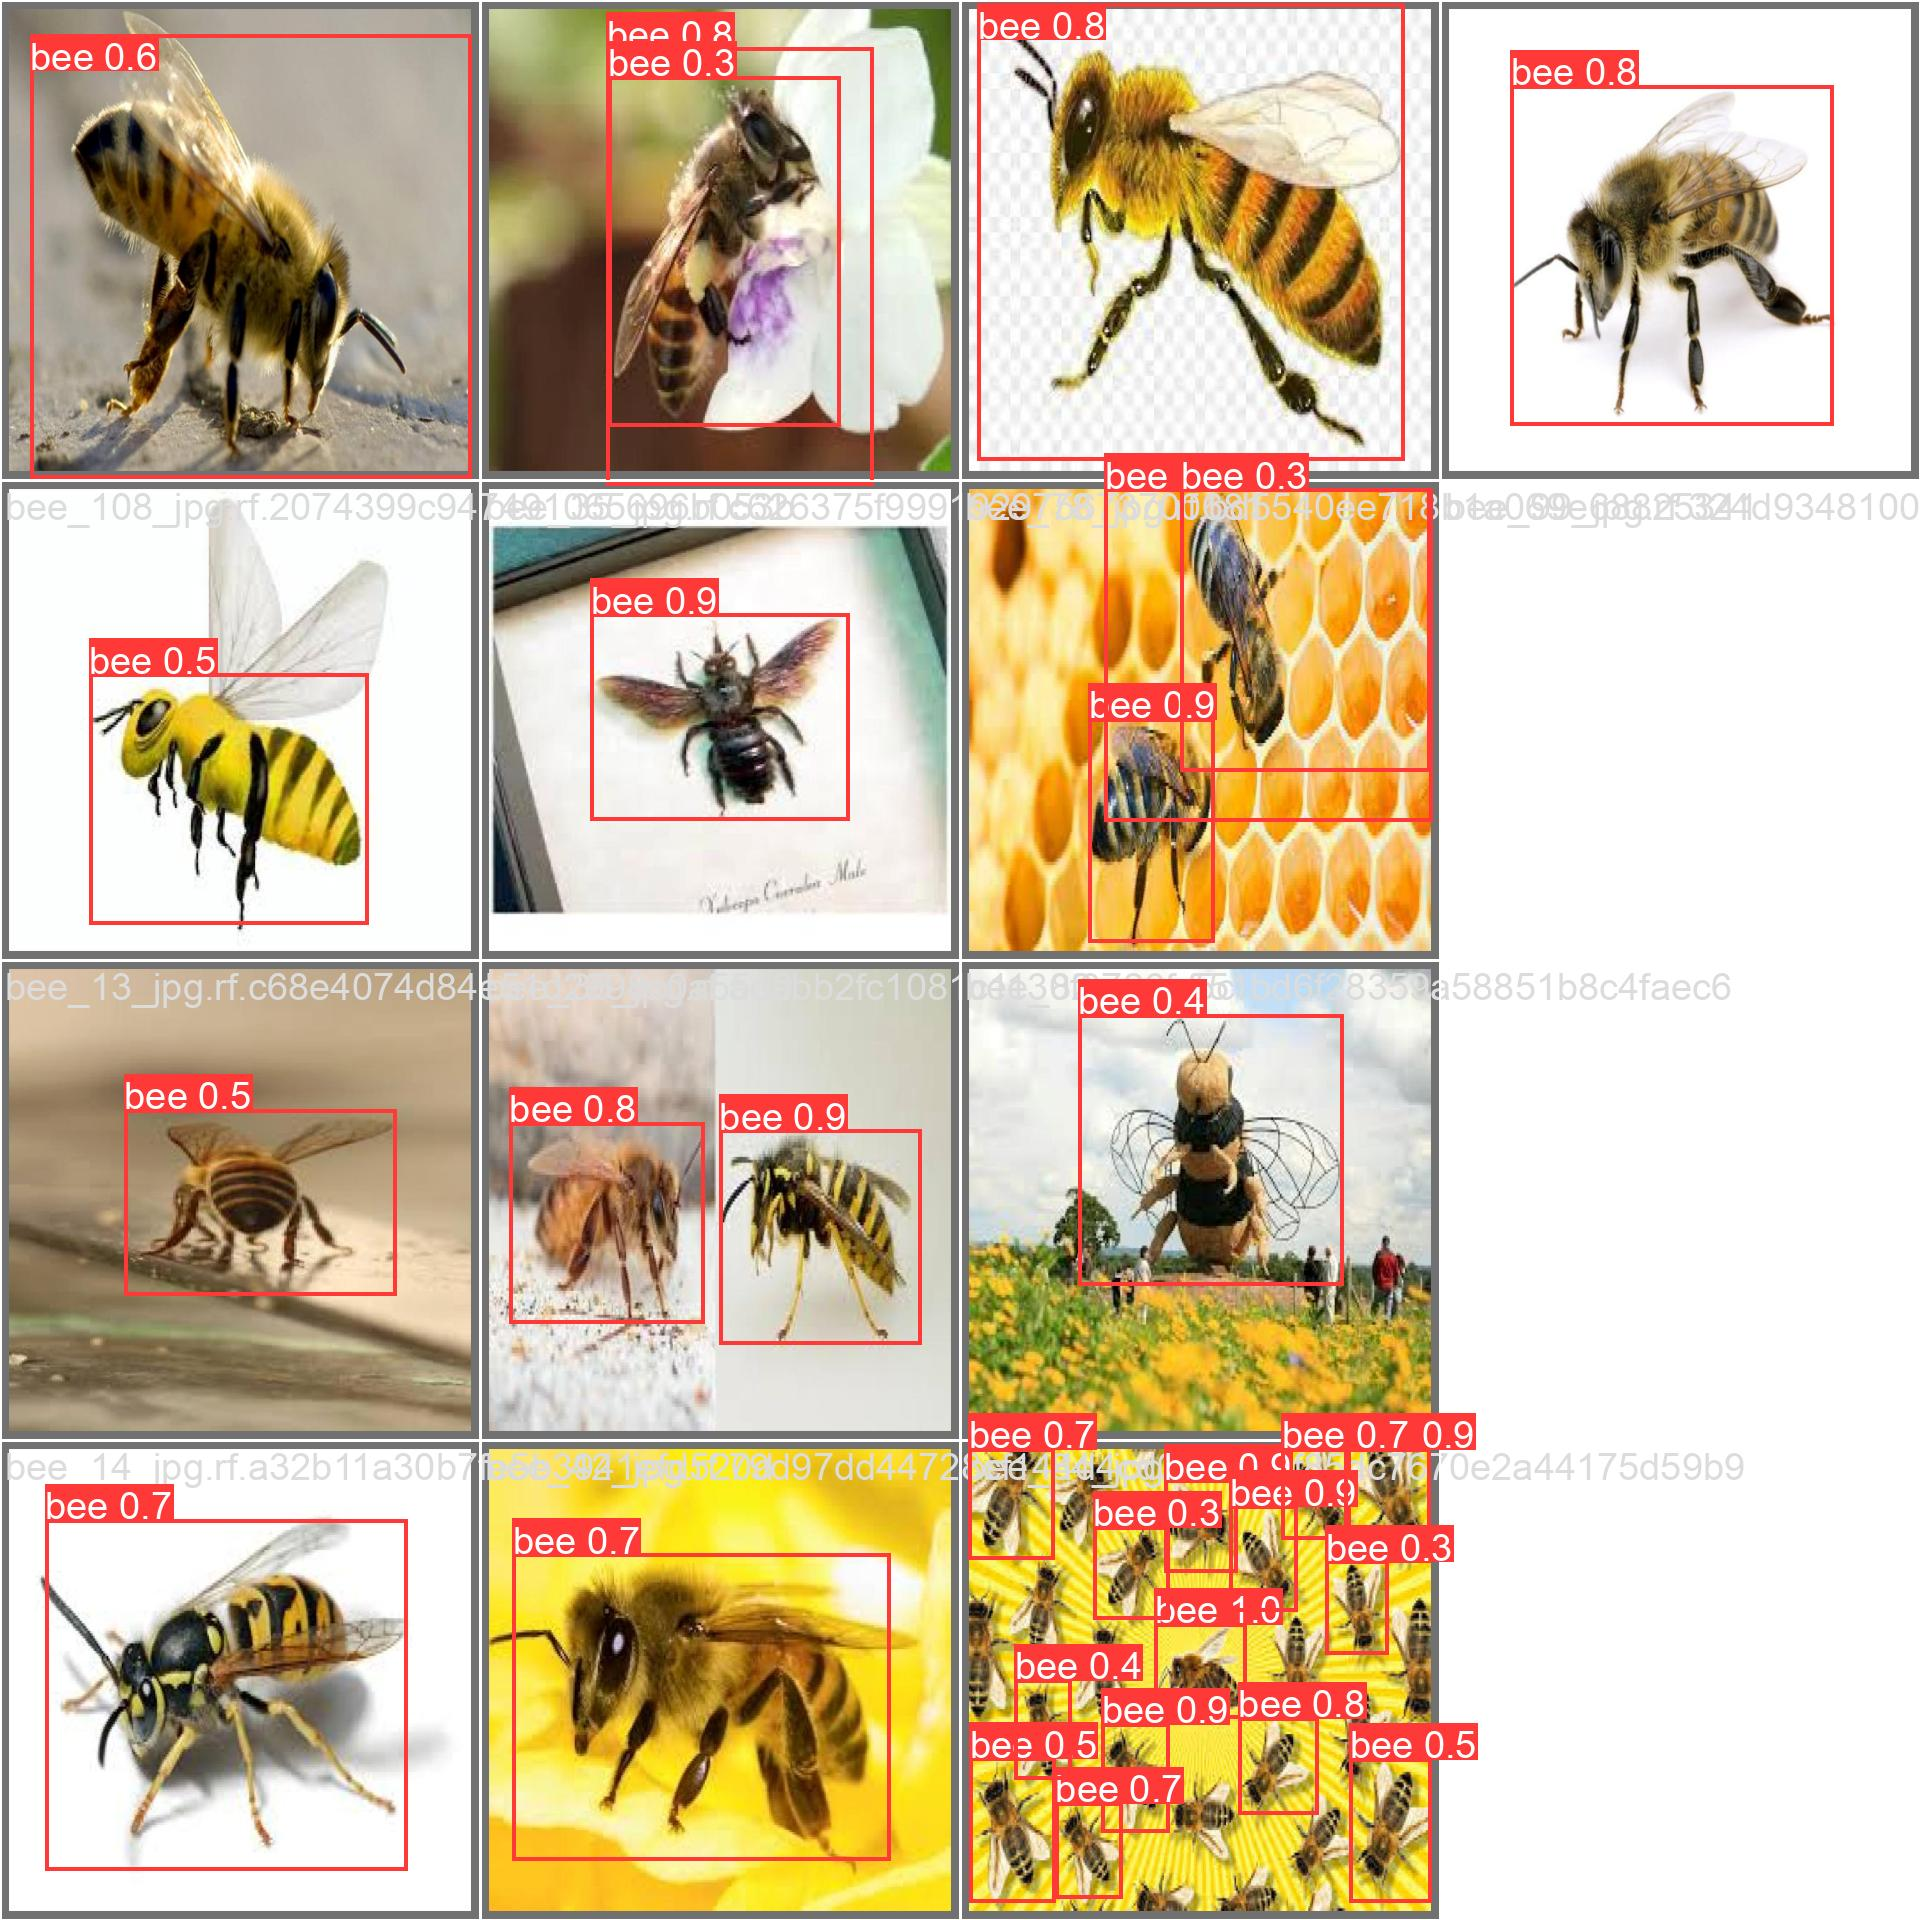

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

Validate Custom Moddel

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-11-13 16:07:24.911855: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 16:07:24.911915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 16:07:24.911961: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 16:07:24.920743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 16:07:26.276693: W ten

Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-11-13 16:07:44.205880: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 16:07:44.205955: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 16:07:44.205999: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 16:07:44.218590: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 16:07:46.013791: W ten

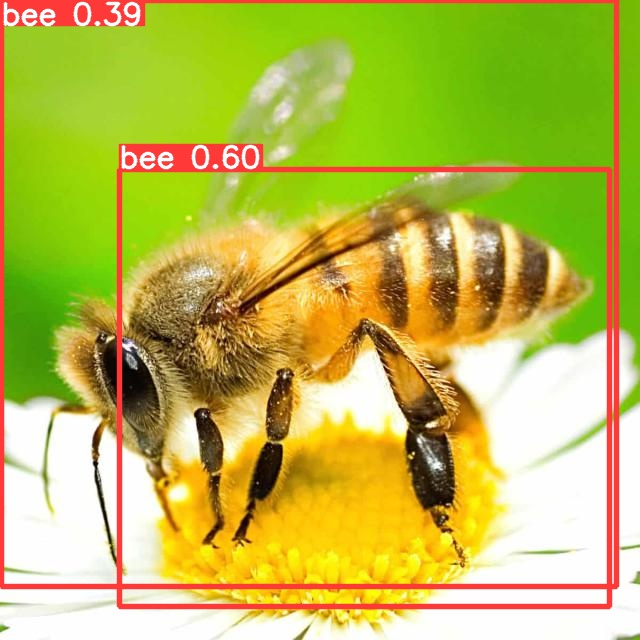

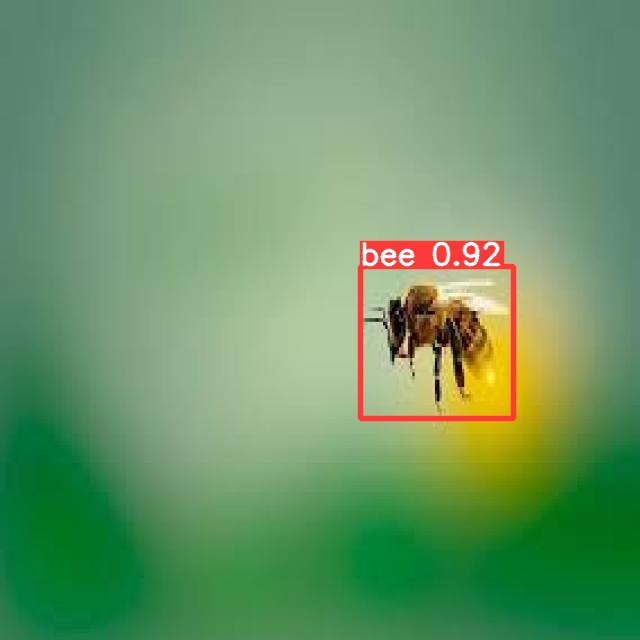

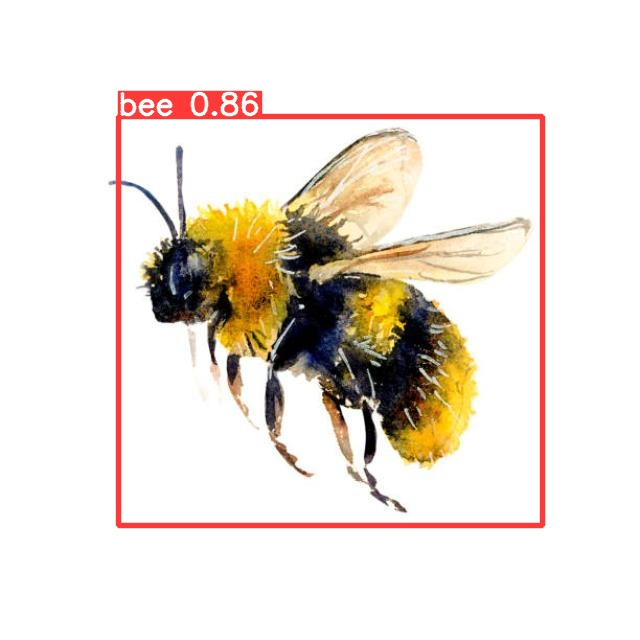

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [34]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/bee_hornet.jpeg save=True

/content
2023-11-20 17:15:38.272831: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 17:15:38.272888: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 17:15:38.272928: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 17:15:39.328717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/bee_hornet.jpeg: 448x640 1 bee, 1 hornet, 

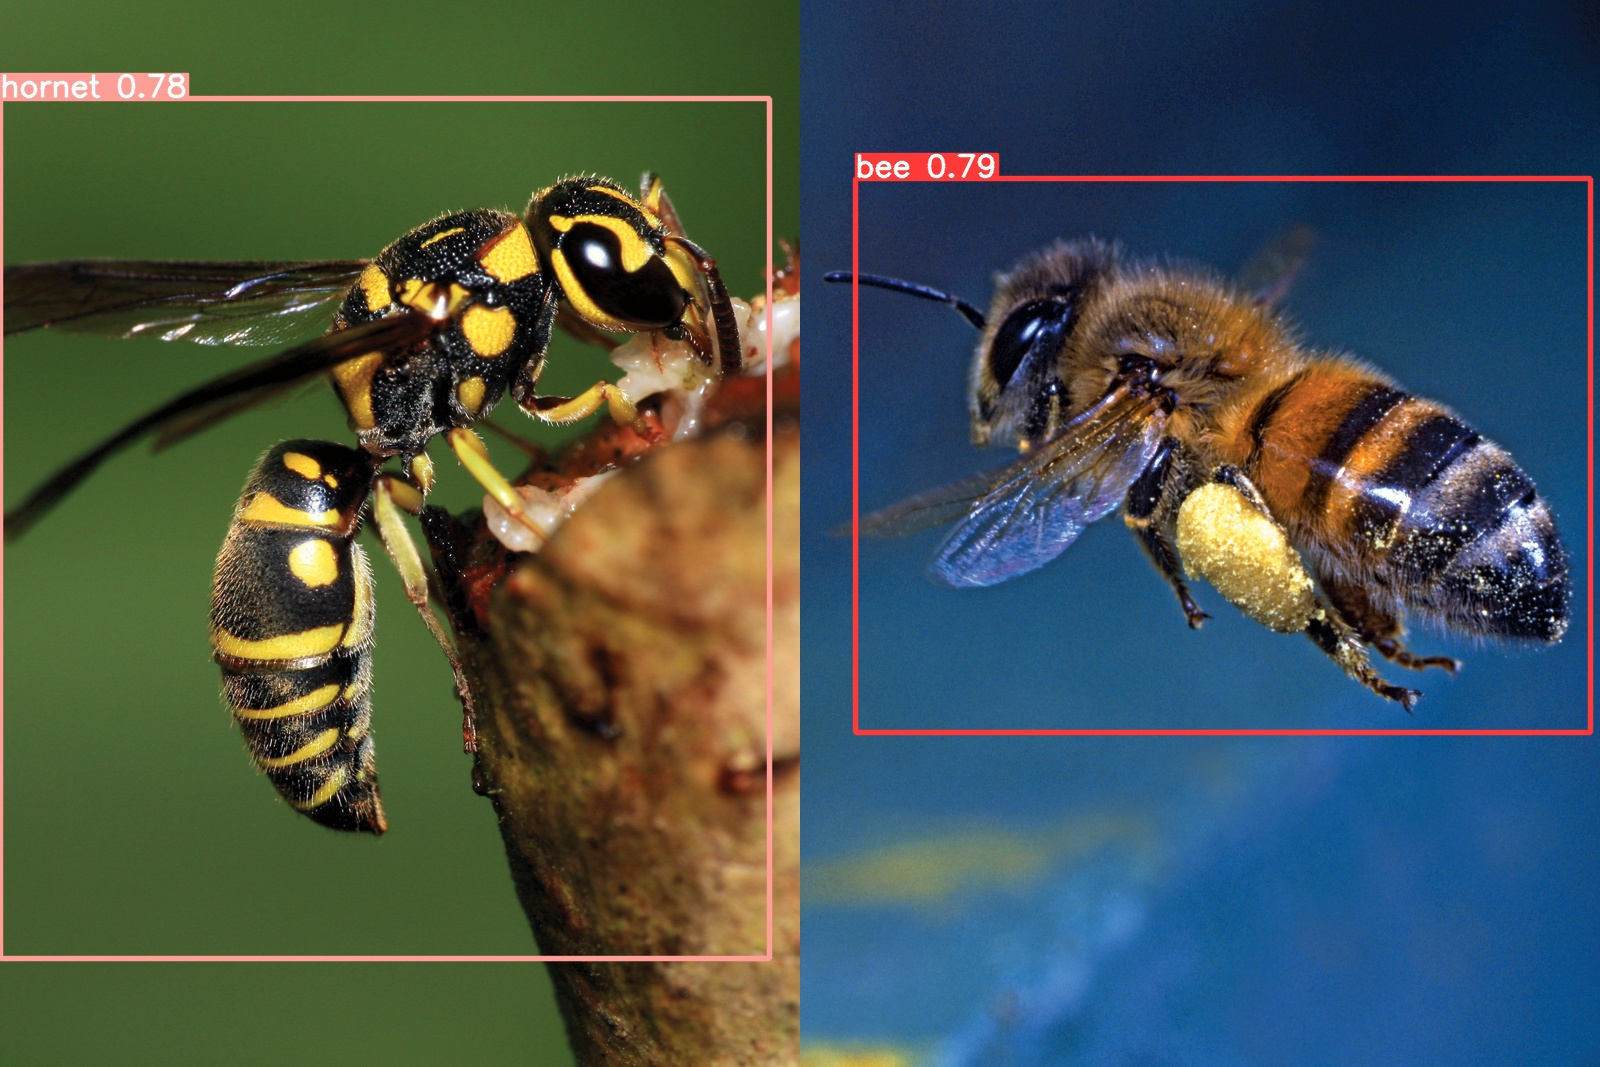

In [36]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpeg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [37]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/bee_hornet_video.mp4 save=True

/content
2023-11-20 17:16:47.499715: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 17:16:47.499770: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 17:16:47.499811: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 17:16:48.537057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/3298) /content/bee_hornet_video.mp4: 384x640 76.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.mp4'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [1]:
from ipywidgets import Video
Video.from_file("bee_hornet_video (1).mp4", width=320, height=320)